# Import the required packages

In [7]:
!pip install tensorflow


     -------------------------------------- 385.0/385.0 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ------------------------------------ 133.7/133.7 kB 717.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 267.2/267.2 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing in

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Load the Dataset

In [19]:
df = pd.read_csv("C:/Users/vinod/Downloads/archive (2)/training.1600000.processed.noemoticon.csv", encoding='latin1', header=None)


In [20]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Rename columns 

In [21]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Delete the unnecessary columns

In [22]:
df = df[['sentiment', 'text']]

# Convert the sentiment values to binary 

In [23]:
df['sentiment'] = df['sentiment'].replace({4: 1})

C:\Users\vinod\AppData\Local\Temp\ipykernel_15108\2397483158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({4: 1})


In [24]:
print(df['sentiment'].value_counts())

0    800000
1    800000
Name: sentiment, dtype: int64


# Split the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Converting text data into numerical

In [27]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Reduced to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)  # Sparse matrix
X_test_tfidf = vectorizer.transform(X_test) 

# Building the model

In [29]:
input_layer = Input(shape=(X_train_tfidf.shape[1],), sparse=True)
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dropout_1 = Dropout(0.3)(dense_layer_1)
dense_layer_2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_layer_2)
output_layer = Dense(1, activation='sigmoid')(dropout_2)

In [30]:
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=512, validation_data=(X_test_tfidf, y_test))


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 196s 77ms/step - accuracy: 0.7503 - loss: 0.5035 - val_accuracy: 0.7719 - val_loss: 0.4724
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 191s 76ms/step - accuracy: 0.7816 - loss: 0.4578 - val_accuracy: 0.7772 - val_loss: 0.4644
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 194s 77ms/step - accuracy: 0.8047 - loss: 0.4199 - val_accuracy: 0.7771 - val_loss: 0.4691
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 221s 88ms/step - accuracy: 0.8317 - loss: 0.3706 - val_accuracy: 0.7743 - val_loss: 0.4884
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 180s 72ms/step - accuracy: 0.8533 - loss: 0.3253 - val_accuracy: 0.7711 - val_loss: 0.5216
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 189s 76ms/step - accuracy: 0.8686 - loss: 0.2940 - val_accuracy: 0.7684 - val_loss: 0.5634
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 182s 73ms/step - accuracy: 0.8781 - loss: 0.2713 - val_accuracy: 0.7663 - val_loss: 0.5852
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4463s 2s/step - accuracy: 0

# Evaluate the model on the test set

In [33]:
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print(f"Test Accuracy: {accuracy}")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7625 - loss: 0.6625
Test Accuracy: 0.763268768787384


# Plotting accuracy values

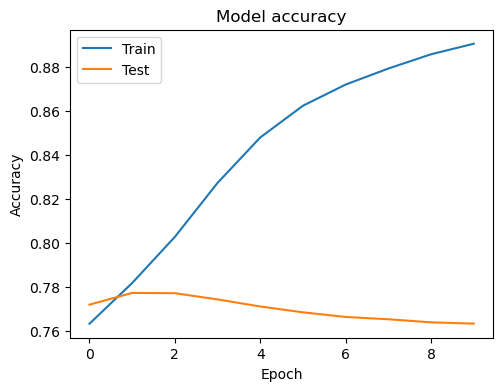

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plotting model loss

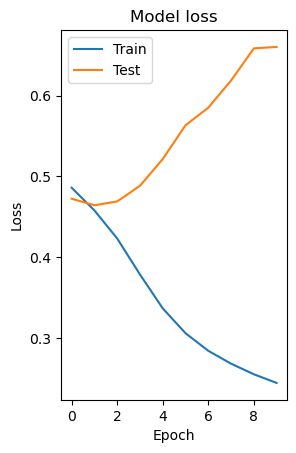

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()